# Creating  A classifier to recognize adidas, nike and puma sneakers.



## Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

### how to create a deep learning dataset using google images

In [0]:
from fastai.vision import *
%matplotlib inline

## Geting a list of URLs

### Downloading into file

We will need to get the urls of each of the images. Before running the following commands, we may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then we can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Creatinge directory and uploading urls file into our server

In [0]:
folder = 'nike'
file = 'nike.txt'

In [0]:
folder = 'adidas'
file = 'adidas.txt'

In [0]:
folder = 'puma'
file = 'puma.txt'

We will need to run this cell once per each category.

In [0]:
path = Path('data/shoe')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[PosixPath('data/shoe/adidas.txt'),
 PosixPath('data/shoe/adidas'),
 PosixPath('data/shoe/nike'),
 PosixPath('data/shoe/puma'),
 PosixPath('data/shoe/puma.txt'),
 PosixPath('data/shoe/nike.txt')]

## Downloading images from google

In [0]:
classes = ['adidas','nike','puma']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
#download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## Viewing data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [18]:
data.classes

['adidas', 'nike', 'puma']

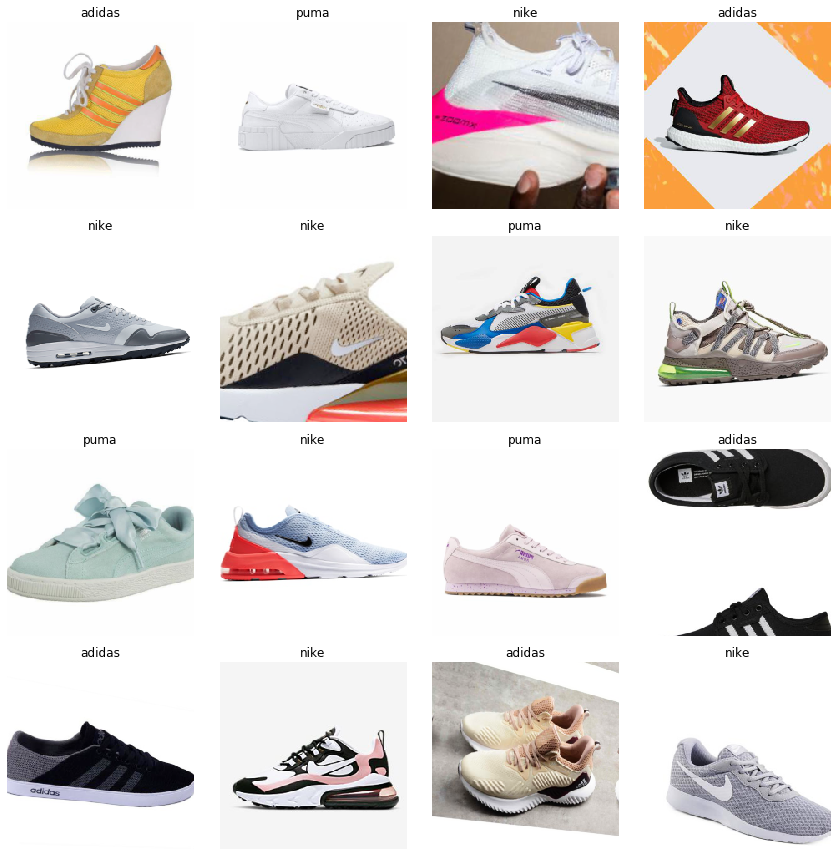

In [19]:
data.show_batch(rows=4, figsize=(12,12))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['adidas', 'nike', 'puma'], 3, 301, 75)

## Training model

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 249MB/s]


In [22]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,2.064385,2.150225,0.560000,00:05
1,1.857115,1.196203,0.533333,00:05
2,1.669208,1.172781,0.453333,00:05
3,1.503210,1.225521,0.360000,00:05
4,1.298726,1.372936,0.413333,00:05
5,1.167914,1.369475,0.386667,00:05
6,1.086286,1.329452,0.413333,00:05
7,0.988775,1.252949,0.373333,00:05
8,0.916217,1.150690,0.360000,00:05
9,0.844732,1.102120,0.346667,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.539844,1.034705,0.333333,00:05
1,0.428499,1.024875,0.320000,00:05
2,0.386778,1.013832,0.333333,00:05
3,0.377882,1.027780,0.346667,00:05
4,0.388347,1.028687,0.360000,00:05


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

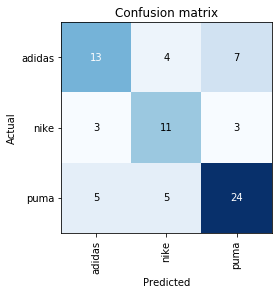

In [31]:
interp.plot_confusion_matrix()

In [32]:
#interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

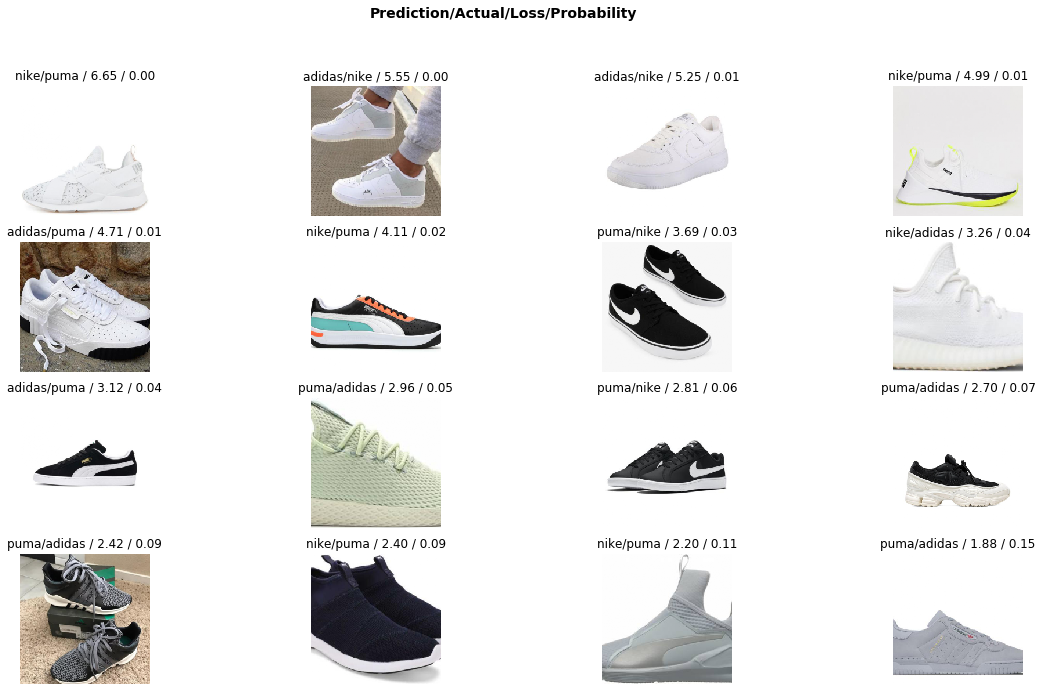

In [50]:
interp.plot_top_losses(16, figsize=(20,11))

In [53]:
interp.most_confused(min_val=2)

[('adidas', 'puma', 7),
 ('puma', 'adidas', 5),
 ('puma', 'nike', 5),
 ('adidas', 'nike', 4),
 ('nike', 'adidas', 3),
 ('nike', 'puma', 3)]

In [0]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [121]:
top_loss_paths

ImageList (75 items)
Image (3, 500, 500),Image (3, 480, 500),Image (3, 499, 427),Image (3, 500, 391),Image (3, 428, 500)
Path: data/shoe

In [122]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


# Zipping and saving the shoe folder and model

In [143]:
!zip -r shoe.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/shoe/ (stored 0%)
  adding: content/data/shoe/adidas.txt (deflated 59%)
  adding: content/data/shoe/adidas/ (stored 0%)
  adding: content/data/shoe/adidas/00000080.jpg (deflated 2%)
  adding: content/data/shoe/adidas/00000032.jpg (deflated 7%)
  adding: content/data/shoe/adidas/00000033.jpg (deflated 5%)
  adding: content/data/shoe/adidas/00000082.jpg (deflated 6%)
  adding: content/data/shoe/adidas/00000004.jpg (deflated 1%)
  adding: content/data/shoe/adidas/00000092.jpg (deflated 29%)
  adding: content/data/shoe/adidas/00000002.jpg (deflated 10%)
  adding: content/data/shoe/adidas/00000088.png (deflated 1%)
  adding: content/data/shoe/adidas/00000063.jpg (deflated 1%)
  adding: content/data/shoe/adidas/00000029.jpg (deflated 9%)
  adding: content/data/shoe/adidas/00000075.jpg (deflated 2%)
  adding: content/data/shoe/adidas/00000074.jpg (deflated 3%)
  adding: content/data/shoe/adidas/00000048.jpg (deflated 1%)
  adding: con

In [0]:
!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import sys

In [0]:
zipname = 'shoe'

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file1 = drive.CreateFile()
file1.SetContentFile(zipname+".zip")
file1.Upload()

## Putting  model in production

In [0]:
learn.export()

In [56]:
path.ls()

[PosixPath('data/shoe/adidas.txt'),
 PosixPath('data/shoe/adidas'),
 PosixPath('data/shoe/models'),
 PosixPath('data/shoe/nike'),
 PosixPath('data/shoe/puma'),
 PosixPath('data/shoe/puma.txt'),
 PosixPath('data/shoe/nike.txt'),
 PosixPath('data/shoe/export.pkl')]

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path)

prediction : puma


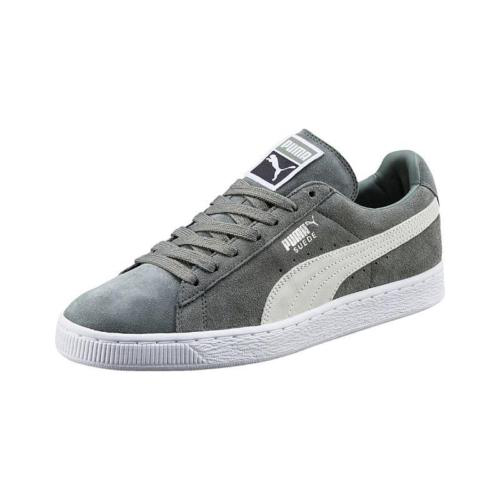

In [103]:
img2 = open_image(path/'puma'/'00000021.jpg')
pred_class,pred_idx,outputs = learn.predict(img2)
print("prediction : "+str(pred_class))
img2

prediction : adidas


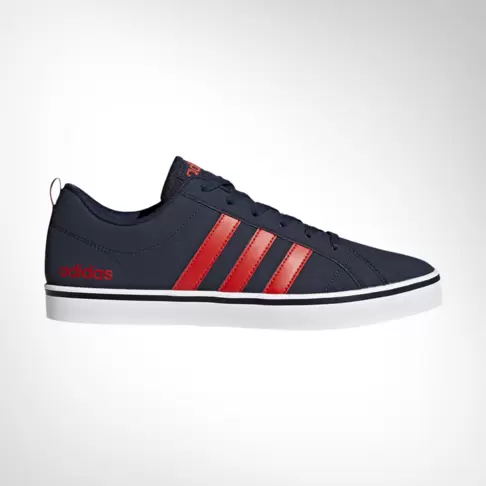

In [151]:
img222 = open_image('/content/adi.jpg')
pred_class,pred_idx,outputs = learn.predict(img222)
print("prediction : "+str(pred_class))
img222

In [0]:
#shoeNet = load_learner('/content/data/shoe/')
#pred_class1,pred_idx1,outputs1 = shoeNet.predict(img21)

prediction : nike


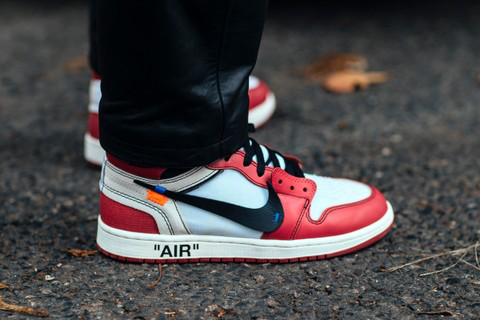

In [114]:
img21 = open_image('/content/nike4.jpg')
pred_class1,pred_idx1,outputs1 = shoeNet.predict(img21)
print("prediction : "+str(pred_class1))
img21